In [46]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import japanize_matplotlib

In [47]:
df1 = pd.read_csv("log_2024_06_06_18_21_25.csv",
    names = ["n","y","ymax","x0","x1","x0max","x1max","constraints"],
    encoding="SHIFT-JIS")

df2 = pd.read_csv("log_2024_06_06_19_26_54.csv",
    names = ["n","y","ymax","x0","x1","x0max","x1max","constraints"],
    encoding="SHIFT-JIS")

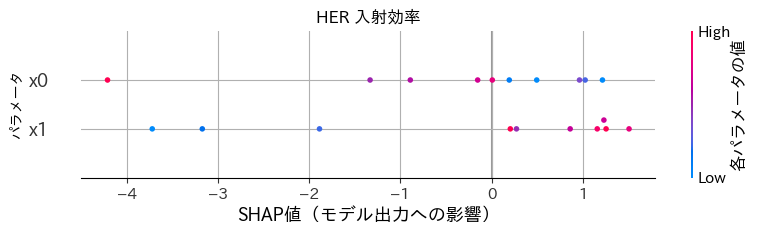

In [53]:
# データをトレーニングセットとテストセットに分割
X = df1[["x0", "x1"]]
y = df1["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレスト回帰モデルをトレーニング
model = RandomForestRegressor(n_estimators=100, random_state=4)
model.fit(X_train, y_train)

# SHAP explainerを初期化
explainer = shap.TreeExplainer(model)

# テストセットに対してSHAP値を計算
shap_values = explainer.shap_values(X_test)

# 特徴量の順序を固定する
fixed_feature_order = ["x0","x1"]

# SHAP値を特徴量ごとに集計
shap_values_df = pd.DataFrame(shap_values, columns=fixed_feature_order)

# プロットの作成
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_test, feature_names=fixed_feature_order, sort=False, show=False)

# 右側のカラーラベルを変更する
color_bar = plt.gcf().get_axes()[1]
color_bar.set_ylabel("各パラメータの値", fontsize=12)

# カラーバーに目盛りを追加
#color_bar_ticks = color_bar.get_yticks()
#color_bar.set_yticklabels([f'{min(y) + tick*(max(y)-min(y)) :.2f}' for tick in color_bar_ticks], fontsize=10)

# プロットのカスタマイズ
plt.title("LER 入射効率")
plt.xlabel("SHAP値（モデル出力への影響）")
plt.ylabel("パラメータ")
plt.grid()
#plt.gca().invert_yaxis()  # 縦軸を反転して上から固定順に表示

# プロットを表示
plt.show()

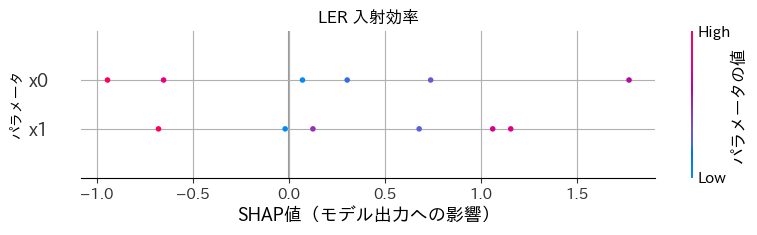

In [54]:
# データをトレーニングセットとテストセットに分割
X = df2[["x0", "x1"]]
y = df2["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレスト回帰モデルをトレーニング
model = RandomForestRegressor(n_estimators=100, random_state=4)
model.fit(X_train, y_train)

# SHAP explainerを初期化
explainer = shap.TreeExplainer(model)

# テストセットに対してSHAP値を計算
shap_values = explainer.shap_values(X_test)

# 特徴量の順序を固定する
fixed_feature_order = ["x0","x1"]

# SHAP値を特徴量ごとに集計
shap_values_df = pd.DataFrame(shap_values, columns=fixed_feature_order)

# プロットの作成
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_test, feature_names=fixed_feature_order, sort=False, show=False)

# 右側のカラーラベルを変更する
color_bar = plt.gcf().get_axes()[1]
color_bar.set_ylabel("パラメータの値", fontsize=12)

# カラーバーに目盛りを追加
color_bar_ticks = color_bar.get_yticks()
#color_bar.set_yticklabels([f'{min(y) + tick*(max(y)-min(y)) :.2f}' for tick in color_bar_ticks], fontsize=10)

# プロットのカスタマイズ
plt.title("LER 入射効率")
plt.xlabel("SHAP値（モデル出力への影響）")
plt.ylabel("パラメータ")
plt.grid()
#plt.gca().invert_yaxis()  # 縦軸を反転して上から固定順に表示

# プロットを表示
plt.show()